In [20]:
import time as tm
import numpy as np
import urllib as ull
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4 import SoupStrainer

In [13]:
yrsAvailable = [str(k)[2:] for k in range(1992, 2019)]
articleNum = []

for yr in yrsAvailable:
    tm.sleep(0.5)
    arxiv ='https://arxiv.org/year/cond-mat/' + yr
    
    with ull.request.urlopen(arxiv) as arxivUll:
        onlyP = SoupStrainer('p')
        arxivSoup = BeautifulSoup(arxivUll, parse_only=onlyP)  
        parsed = [
            k.split(' ')[0] 
            for k in arxivSoup.stripped_strings 
            if 'articles' in k.split(' ') or 'cross-lists' in k.split(' ')] [1:]
        
    articleNum.append(int(parsed[0]) + int(parsed[1]))

articleNum = list(zip(list(range(1992, 2019)), articleNum))
print(articleNum)

[(1992, 283),
 (1993, 829),
 (1994, 1541),
 (1995, 2200),
 (1996, 2956),
 (1997, 3877),
 (1998, 5117),
 (1999, 6007),
 (2000, 6585),
 (2001, 7628),
 (2002, 8391),
 (2003, 9104),
 (2004, 9829),
 (2005, 10258),
 (2006, 10229),
 (2007, 10407),
 (2008, 11347),
 (2009, 11419),
 (2010, 13092),
 (2011, 13975),
 (2012, 14810),
 (2013, 15381),
 (2014, 15771),
 (2015, 16764),
 (2016, 17589),
 (2017, 17539),
 (2018, 13665)]

Over two decades, the number of Condensed Matter pre-prints posted to arXiv has ballooned by nearly a factor of 70! Now let's look at the full list for a particular list and try to get some information about the articles posted.

In [7]:
print('Total number of articles: ', sum(articleNum))

Total number of articles:  256593


That's a quarter million papers posted within the condensed matter sub-arXiv in the past 20 years!! Presumably we can do a lot with all of this information. 

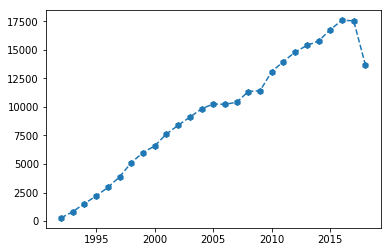

In [34]:
_, ax1 = plt.subplots()
ax1.plot(list(zip(*articleNum))[0], list(zip(*articleNum))[1], '--h')
plt.show()